In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# render the plot inline, instead of in a separate window
%matplotlib inline

In [4]:
df = pd.read_csv("data/pima-data.csv")

In [5]:
df.shape # take a look at the shape

(768, 10)

In [6]:
df.head(5) # take a look at the first and last few lines

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [8]:
# We want to eliminate columns that are:
#     1. no values
#     2. not used
#     3. duplicates
#     4. correlated columns

In [9]:
#Check for null values
df.isnull().values.any() #looks like we don't have any nulls

False

In [8]:
#Check for Correlated columns

def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks

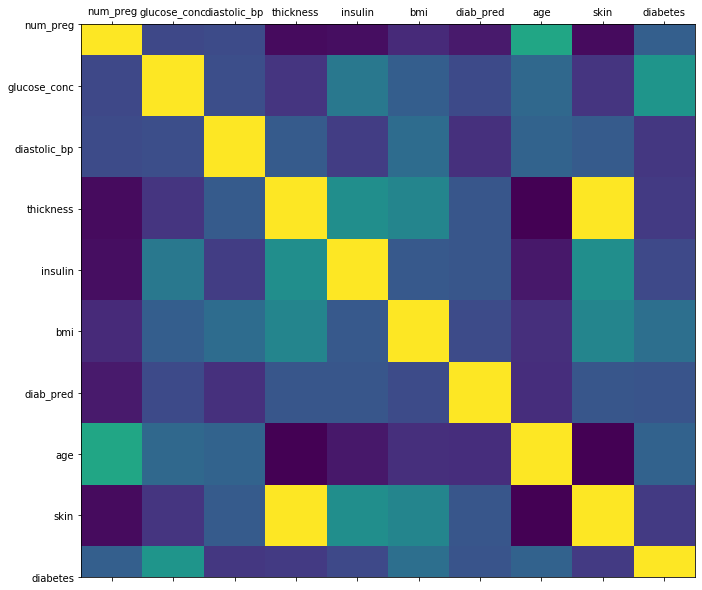

In [9]:
plot_corr(df)

In [10]:
# looks like skin and thickness are highly correlated. Let's check the exact numbers for correlation

df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
# skin and thickness has correlation of 1! So we can remove one of them. I'll remove the skin column here.

del df['skin']

In [12]:
# check if it's been removed
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:
#Molding the data:

    #Adjusting data types
    #Adding new columns as required

#Check Data Types

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [15]:
#The Diabetes column is string. We should vectorize it: change True to 1, False to 0 by using mapping

diabetes_map = {True:1, False:0}
df['diabetes']=df['diabetes'].map(diabetes_map)

In [16]:
#Check that the Diabetes column has been replaced by 1 and 0

df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:

#Let's check if we have enough information in the dataset to build a model 
#(i.e. is there enough people who have diabetes to provide the base for the modeling?)

In [18]:
#Check True/False Ratio

num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [ ]:
#In this dataset there is ~34% of cases where the instances have diabetes. Good distribution of true and false cases, so no more work is needed

In [ ]:
'''Selecting the algorithm
Which algorithm we'll select depends on the following criteria:

Learning type: supervised vs. non-supervised
Result: Regressison vs. Classification
Complexity
Basic vs. enhanced
Our selection criteria are:

Supervised
Supports binary classification
Not-ensemble problems (we'll use that for model tuning later)
Potential algorithms:

Naive Bayes
Based on likelihood and probability
Every feature has the same weight (i.e. 'naive')
Requires a smaller amount of data to train
Logistic Regression
Gives binary results
Features are weighted
Decision Tree
Binary Tree
Nodes contains decision
Requires a lot of data to train, and is a bit slower
We'll use Naive Bayes for this model.'''

In [37]:
#Splitting the data

#Use scikit-learn to split: 70% for training data, 30% for testing data

from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=42)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution


In [38]:
#Check if split is done correctly
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [39]:
#Let's check to make sure that the values are distributed evenly across the training and testing data

print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [40]:
#Post splitting data preparation
#Find hidden missing values (i.e. where the row = 0)

df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [42]:
#We can see that one of the rows in thickness column is 0, which is not possible.
#Let's check how many other cells = 0 there are:


print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [ ]:
'''How to handle missing data:
1.Ignore them
2.Delete the rows from the dataframe
3.Replace them with other values (Imputing)
    Options for Imputing:
        a)Replace with mean/median
        b)Replace with expert knowledge derived value (not feasible here)
        c)Use mean imputing'''

In [45]:
#Impute with mean
from sklearn.impute import SimpleImputer

# For all readings == 0, impute with mean
fill_0 = SimpleImputer(missing_values=0,strategy="mean")

X_train= fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [46]:
#Train the data with Naive Bayes

from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [48]:
#Test the model's accuracy with training data

# predict values using training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library from scikit learn
from sklearn import metrics

# check naive bayes model's accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train)))
print()

Accuracy: 0.7542



In [49]:
#Test the model's accuracy with testing data

nb_predict_test=nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test)))

Accuracy:0.7359


In [50]:
#Accuracy is 0.7542 for training model, and 0.7359 for testing model

In [51]:
#Confusion Matrix for Naive Bayes

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,nb_predict_test)))
print("")

Confusion Matrix
[[118  33]
 [ 28  52]]



In [52]:
#Classification Report for Naive Bayes

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test,nb_predict_test)))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
'''recall = true positive rate/ sensitivity = measures how well the model is predicting diabetes when the result is diabetes

Naive Bayes Result
Recall is 0.65, and precision is 0.61, lower than the objective (>70%).


Performance Improvement Options
    Adjust current algorithm (e.g. including new columns)

    Get more data or improve data (not available in Naive Bayes)

    Imrpove training (we'll do this later)

    Try a different algorithm

    We'll try the random forest algorithm to improve performance'''

In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=42)

In [54]:
#Check performance on the training data using Random Forest model

rf_predict_train = rf_model.predict(X_train)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train)))
print()


Accuracy: 1.0000



In [55]:
#Check performance on the testing data using Random Forest model

rf_predict_test = rf_model.predict(X_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy:0.7403



In [56]:
#Accuracy for the training data is 1.0000, for the testing data is 0.71

#Confusion matrix for Random Forest

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

Confusion Matrix
[[119  32]
 [ 28  52]]



In [57]:
#Classification report for Random Forest

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
'''Random Forest Result
Recall is 0.60, and precision is 0.59, both are lower than the Naive Bayes model.

Looks like we have an overfitting problem for the Random Forest model!

How to fix overfitting:

    Regularization hyperparameter - differs from algorithms to algorithms, need to check the documentation on how to amend that.
    Cross validation
    Bias-variance trade-off - sacrifice perfection for better overall performance
    
    
We'll use cross validation later in this project.'''

In [58]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(C=0.7,random_state=42)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test)))
print()
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,lr_predict_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test,lr_predict_test))

Accuracy:0.7489

Confusion Matrix
[[125  26]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
'''Logistic Regression Result
Recall is 0.60, and precision is 0.65, both are lower than the objective (>70%).

Let's try to improve it by changing the regularization parameter for logistic regression model.'''

c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

1st max value of 0.600 occured at C=0.100


c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

Text(0, 0.5, 'recall score')

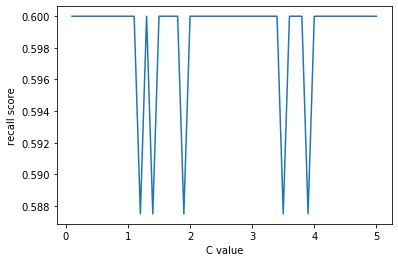

In [59]:
# This section will try C value from 0.1 to 4.9 in increments of 0.1.
# For each C-value, it will create a logistic regression and train with the train data. 
# Afterwards, it will predict the test data for the different C-values, and the highest result is recorded.

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))


# Let's plot the changes in C-values against recall scores to see how the regularization scores impact the recall score

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [ ]:
'''Logistic regression with class_weight="balanced"
This is to solve the fact that the classes are not balanced (i.e. there are 35% Diabetes vs. 65% No Diabetes in this dataset).

Because it's not 50/50, unbalanced classes may yield poor prediction results.

Implementing balanced weight will cause a change in the predicted class boundary.'''

c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

1st max value of 0.713 occured at C=0.200


Text(0, 0.5, 'recall score')

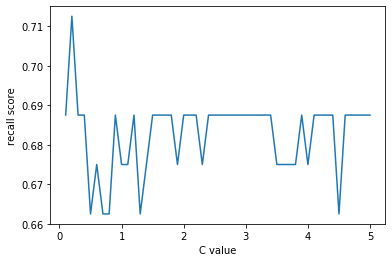

In [60]:

# Similarly to the above section, this will try C value from 0.1 to 4.9 in increments of 0.1.
# For each C-value, it will create a logistic regression and train with the train data, with classes being balanced.
# Afterwards, it will predict the test data for the different C-values, and the highest result is recorded.

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
#     the difference here vs. the original logistic regression model is that this line below includes "class_weight='balanced'"
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))



# Plot the changes in C-values against recall scores to see how the regularization scores impact the recall score, with classes being balanced. 

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [61]:
#Check the training metrics of logistic regression model with balanced classes

from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7056
[[106  45]
 [ 23  57]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       151
           1       0.56      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231

0.7125


c:\users\primal viola miranda\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
'''Logistic Regression with balanced weights:
Recall is 0.71, and precision is 0.56. Recall > 70% means that we've achieved the objective!'''

In [ ]:
'''K-fold Cross Validation
Tuning hyperparameters with Cross Validation

    1)For each fold: Determine best hyperparameter value
    2)Set model hyperparameter value to average best
    3)Sciknit-learn has a model Algorithm CV Variants:

Algorithm + Cross Validation = AlgorithmCV
Ends in "CV"
Exposes fit(),predict()....
Runs the algorithms K times
Can be used like normal algorithm'''

In [62]:
#Use LogisticRegressionCV to do Cross Validation¶

from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

In [63]:
#Use LogisticRegressionCV to predict the testing data

lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Confusion Matrix")
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Confusion Matrix
Accuracy: 0.7056
[[109  42]
 [ 26  54]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



In [ ]:
'''Logistic Regression CV:
Recall is 0.68, and precision is 0.55. This is lower than the Logistic Regression model with balanced weight.

Summary:
Among the models we evaluated:

* Naive Bayes
* Random Forest
* Logistic Regression
* Logistic Regression with balanced classes
* Logistic Regression with Cross Validation

Logistic Regression with balanced classes seems to provide the best recall value (0.74).
Although we also estimate that the Logistic Regression with Cross Validation model may also be more accurate for real-life data.'''